# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [38]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

#### Exporting json data into the workspace

In [9]:
json_df = pd.read_json('data/world_bank_projects.json')
json_df_topten = json_df[['_id','countrycode','countryshortname','project_name']]
frequency = json_df_topten.countrycode.value_counts(dropna=True)
pivot = json_df_topten.pivot_table(index= ['countrycode','countryshortname'], values =['project_name'],aggfunc='count')

# Q1 solution

In [10]:
pivot_sort = pivot.sort_values(by=['project_name'],ascending = False)
print(pivot_sort.head(10))

                                project_name
countrycode countryshortname                
ID          Indonesia                     19
CN          China                         19
VN          Vietnam                       17
IN          India                         16
RY          Yemen, Republic of            13
MA          Morocco                       12
BD          Bangladesh                    12
NP          Nepal                         12
3A          Africa                        11
MZ          Mozambique                    11


In [31]:
json_dfq2 = json_df[['id','countrycode','mjtheme_namecode']]


In [12]:
code = []
names = []

for i in range(len(json_df['mjtheme_namecode'])):
    for r in json_df['mjtheme_namecode'][i]:
        for keys,values in r.items():
            if keys == 'code':
                code.append(values)
            else:
                names.append(values)
            
df_json = pd.DataFrame(list(zip(code,names)))
df_json.rename(columns={0:'code',1:'name'} ,inplace =True)
df_actual = df_json.replace('',np.nan)


df_now =df_actual.dropna()
df_now.reset_index(inplace = True)

df_now1 = df_now.drop(['index'], axis = 1)


df_uniq = pd.DataFrame(df_now1.groupby(['code','name']).size().reset_index())
    
print(df_uniq)


   code                                          name    0
0     1                           Economic management   33
1    10                             Rural development  202
2    11  Environment and natural resources management  223
3     2                      Public sector governance  184
4     3                                   Rule of law   12
5     4      Financial and private sector development  130
6     5                         Trade and integration   72
7     6         Social protection and risk management  158
8     7                   Social dev/gender/inclusion  119
9     8                             Human development  197
10    9                             Urban development   47


#### Alternative way to perform above steps

In [13]:
theme_dict = {'code': [],
              'name': []}

for index, row in json_df.iterrows():
    theme_dict['name'].extend([elem['name'] for elem in row['mjtheme_namecode']])
    theme_dict['code'].extend([elem['code'] for elem in row['mjtheme_namecode']])

    theme_df = pd.DataFrame.from_dict(theme_dict)
df_actual = theme_df.replace('', np.nan)
df_now =df_actual.dropna()
df_now.reset_index(inplace = True)

df_now1 = df_now.drop(['index'], axis = 1)


df_uniq = pd.DataFrame(df_now1.groupby(['code','name']).size().reset_index())
    
print(df_uniq)


   code                                          name    0
0     1                           Economic management   33
1    10                             Rural development  202
2    11  Environment and natural resources management  223
3     2                      Public sector governance  184
4     3                                   Rule of law   12
5     4      Financial and private sector development  130
6     5                         Trade and integration   72
7     6         Social protection and risk management  158
8     7                   Social dev/gender/inclusion  119
9     8                             Human development  197
10    9                             Urban development   47


# Q3 Solution

#### Below both df_uniq and df_actual are compared and the missing value in df_actual are replaced accordingly.

In [14]:
for ai in range(len(df_actual['code'])):
    for ar in range(len(df_uniq['code'])):
        if df_actual['code'][ai] == df_uniq['code'][ar]:
            df_actual['name'][ai] = df_uniq['name'][ar]
            

In [28]:
df_merged=pd.merge(df_actual,df_uniq,on=['code','name'])


In [30]:
df_merged.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

# Q2 Solution

#### As shown  below pivot _table is used to find all the unique project theme and then sort them with there count and sort it in descending order.

In [15]:
pivot1 = df_actual.pivot_table(index=['name'],values=['code'],aggfunc='count')
pivot1_sort = pivot1.sort_values(by=['code'],ascending=False)[0:10].reset_index()
print(pivot1_sort)

                                           name  code
0  Environment and natural resources management   250
1                             Rural development   216
2                             Human development   210
3                      Public sector governance   199
4         Social protection and risk management   168
5      Financial and private sector development   146
6                   Social dev/gender/inclusion   130
7                         Trade and integration    77
8                             Urban development    50
9                           Economic management    38


Text(0.5, 1.0, 'top 10 major project themes')

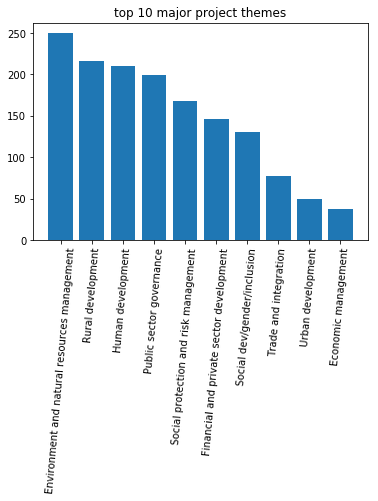

In [16]:
plot_df = plt.bar(pivot1_sort['name'],pivot1_sort['code'])
plt.xticks(rotation=85)
plt.title('top 10 major project themes')